In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

Uploading data with Metro stations and Districts from csv file into dataframe

In [29]:
df_st_distr=pd.read_csv("Station-District.csv",sep=';')
df_st_distr.head()

,Station,Line,AdmArea,global_id,District,Status,ID
0,Третьяковская,Калининская линия,Центральный административный округ,58701962,район Замоскворечье,действует,136
1,Медведково,Калужско-Рижская линия,Северо-Восточный административный округ,58701963,район Северное Медведково,действует,86
2,Первомайская,Арбатско-Покровская линия,Восточный административный округ,58701964,район Измайлово,действует,41
3,Калужская,Калужско-Рижская линия,Юго-Западный административный округ,58701965,Обручевский район,действует,104
4,Каховская,Большая кольцевая линия,Юго-Западный административный округ,58701966,район Зюзино,строится,251


In [30]:
df_st_distr.shape

(305, 7)

In [31]:
# Deleting columns with irrelevant data
df_st_distr=df_st_distr.drop(columns=["Line", "AdmArea", "global_id", "Status", "ID"])
df_st_distr.head()                                    

,Station,District
0,Третьяковская,район Замоскворечье
1,Медведково,район Северное Медведково
2,Первомайская,район Измайлово
3,Калужская,Обручевский район
4,Каховская,район Зюзино


In [32]:
# Removing word "район" from District's names
for i, row in df_st_distr.iterrows():
    df_st_distr.at[i,"District"] = row["District"].replace("район","").strip()
    
df_st_distr.head()


,Station,District
0,Третьяковская,Замоскворечье
1,Медведково,Северное Медведково
2,Первомайская,Измайлово
3,Калужская,Обручевский
4,Каховская,Зюзино


In [33]:
df_st_distr.shape

(305, 2)

In [34]:
# Removing duplicates (some stations mentioned 2 or more times because they are correspondent stations on different lines)
df_st_distr1=df_st_distr.drop_duplicates()
df_st_distr1.shape

(266, 2)

Now we have dataframe with Metro Stations and Districts

In [35]:
#We will be using a csv file that has the geographical coordinates of each metro station
df_geo=pd.read_csv("Metro coordinates.csv",sep=';')
df_geo.head()

,Station,Latitude,Longitude
0,Аэропорт,55.79981,37.53412
1,Академическая,55.68808,37.57501
2,Алексеевская,55.80737,37.63844
3,Александровский сад,55.75219,37.60836
4,Алтуфьево,55.89504,37.58605


In [36]:
df_geo.shape

(165, 3)

In [37]:
# Merging DF with Stataion&District and DF with Station&gGodata
df1=pd.merge(df_st_distr1,df_geo,how='inner',on="Station")

df1.head()

,Station,District,Latitude,Longitude
0,Третьяковская,Замоскворечье,55.74061,37.62492
1,Медведково,Северное Медведково,55.88594,37.66120
2,Первомайская,Измайлово,55.79342,37.79979
3,Калужская,Обручевский,55.65566,37.53923
4,Каховская,Зюзино,55.65332,37.59722


In [38]:
df1.shape

(152, 4)

In [8]:
from geopy.geocoders import Nominatim 
import geopy
# convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [9]:
#get Latitute and longitude of Moscow

address = 'Moscow, Russia'

geolocator = Nominatim(user_agent="ON")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Moscow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Moscow are 55.7504461, 37.6174943.


In [10]:
# create map of Moscow using latitude and longitude values
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, Station, District in zip(df1['Latitude'], df1['Longitude'], df1['Station'], df1['District']):
    label = '{}, {}'.format(District, Station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_moscow) 
map_moscow

In [11]:
# Foursquare
CLIENT_ID = '1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE' # my Foursquare ID
CLIENT_SECRET = '4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE
CLIENT_SECRET:4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1


In [12]:
#URL for top 100 venues in 1000m
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 1000 # define radius

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    latitude, 
    longitude, 
    VERSION,
    RADIUS, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE&client_secret=4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1&ll=55.7504461,37.6174943&v=20180605&radius=1000&limit=100'

In [14]:
# sent GET request and examine result
results = requests.get(url).json()


In [15]:
# Write a function to explore neighbourhoods in Moscow
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
                
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
moscow_venues = getNearbyVenues(df1.District, df1.Latitude, df1.Longitude)
moscow_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Замоскворечье,55.74061,37.62492,Tretyakov Gallery (Третьяковская галерея),55.741006,37.621095,Art Museum
1,Замоскворечье,55.74061,37.62492,Эссе,55.741163,37.628770,Jazz Club
2,Замоскворечье,55.74061,37.62492,Издательский дом «Самокат»,55.738188,37.626196,Bookstore
3,Замоскворечье,55.74061,37.62492,ABC Coffee Roasters,55.741158,37.622940,Coffee Shop
4,Замоскворечье,55.74061,37.62492,Республика,55.740934,37.625069,Bookstore


In [39]:
moscow_venues.shape

(11684, 7)

In [40]:
#Now run the above function on each neighbourhood and create a new dataframe called toronto_venues.
df3=moscow_venues.groupby('District').count()
df3.sort_values(by='Venue',ascending=False)

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Тверской,1400,1400,1400,1400,1400,1400
Красносельский,599,599,599,599,599,599
Таганский,537,537,537,537,537,537
Замоскворечье,500,500,500,500,500,500
Дорогомилово,432,432,432,432,432,432
Басманный,382,382,382,382,382,382
Хамовники,372,372,372,372,372,372
Пресненский,337,337,337,337,337,337
Арбат,300,300,300,300,300,300


In [41]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(moscow_venues['Venue Category'].unique())))

There are 398 uniques categories.


In [42]:
# one hot encoding
moscow_onehot = pd.get_dummies(moscow_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
moscow_onehot['District'] = moscow_venues['District'] 

# move District column to the first column
fixed_columns = [moscow_onehot.columns[-1]] + list(moscow_onehot.columns[:-1])
moscow_onehot = moscow_onehot[fixed_columns]

moscow_onehot.head()

,District,Accessories Store,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Blini House,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Carpet Store,Castle,Caucasian Restaurant,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Non-Profit,Noodle House,Notary,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Lab,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Public Bathroom,RV Park,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,

In [43]:
#examine the new dataframe size
moscow_onehot.shape

(11684, 399)

In [44]:
# Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
moscow_grouped = moscow_onehot.groupby('District').mean().reset_index()
moscow_grouped.head()

,District,Accessories Store,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Blini House,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Carpet Store,Castle,Caucasian Restaurant,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Non-Profit,Noodle House,Notary,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Lab,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Print Shop,Pub,Public Art,Public Bathroom,RV Park,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,

In [76]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
# create new dataframe and display top 10 venues for each neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = moscow_grouped['District']

for ind in np.arange(moscow_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(moscow_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Академический,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
1,Алексеевский,Coffee Shop,Auto Workshop,Park,Cafeteria,Mobile Phone Shop,Toy / Game Store,Health Food Store,Other Repair Shop,Hobby Shop,Electronics Store
2,Арбат,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery
3,Аэропорт,Coffee Shop,Café,Hotel,Gym / Fitness Center,Cosmetics Shop,Park,Pharmacy,Health Food Store,Supermarket,Eastern European Restaurant
4,Бабушкинский,Supermarket,Fast Food Restaurant,Park,Gym / Fitness Center,Gym,Middle Eastern Restaurant,Cosmetics Shop,Pharmacy,Convenience Store,Food & Drink Shop


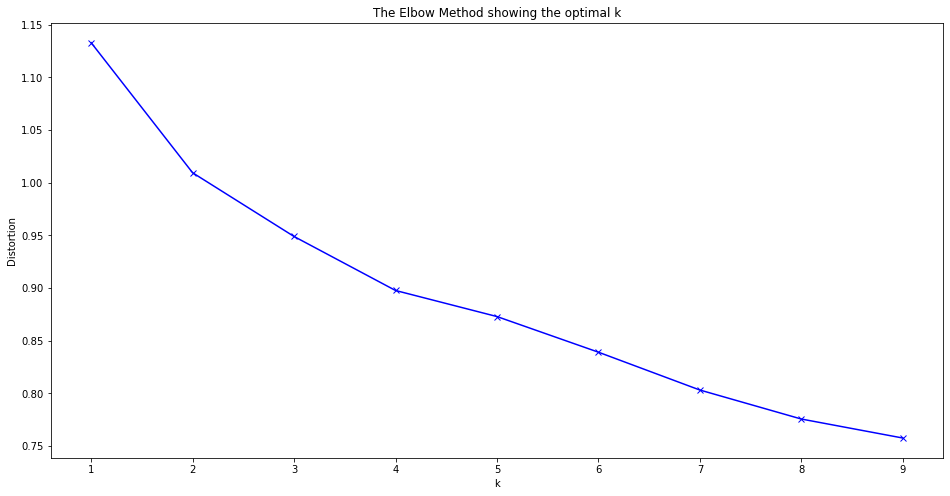

In [46]:
# Examine how many clusters we need 
moscow_grouped_clustering = moscow_grouped.drop('District', 1)

import matplotlib.pyplot as plt
# run K-means with a range of k (elbow method)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(moscow_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

# plot the distortions of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the 'elbow' is the number 6 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 6.

In [77]:
# define k
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(moscow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([1, 1, 5, 5, 2, 5, 1, 0, 5, 4, 1, 2, 5, 5, 5, 5, 1, 2, 1, 1, 5, 1,
       2, 1, 1, 4, 2, 1, 5, 1, 5, 2, 4, 4, 4, 2, 2, 5, 2, 2, 1, 1, 2, 1,
       1, 5, 1, 1, 2, 0, 1, 1, 2, 1, 5, 0, 1, 2, 5, 5, 2, 2, 4, 1, 5, 1,
       2, 4, 3, 1, 1, 4, 5, 1], dtype=int32)

In [78]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

moscow_merged = df1

#merge moscow_grouped with moscow_data to add latitude/longitude for each neighbourhood
moscow_merged = moscow_merged.join(district_venues_sorted.set_index('District'), how='right', on='District')


moscow_merged.head() # check the last columns!

,Station,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Профсоюзная,Академический,55.67822,37.56381,1,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
95,Академическая,Академический,55.68808,37.57501,1,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
67,Алексеевская,Алексеевский,55.80737,37.63844,1,Coffee Shop,Auto Workshop,Park,Cafeteria,Mobile Phone Shop,Toy / Game Store,Health Food Store,Other Repair Shop,Hobby Shop,Electronics Store
51,Арбатская,Арбат,55.75228,37.60357,5,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery
62,Смоленская,Арбат,55.74823,37.58384,5,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery


In [79]:
moscow_merged['Cluster Labels'].value_counts()

5    66
1    44
2    21
4    14
0     6
3     1
Name: Cluster Labels, dtype: int64

In [80]:
 #create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(moscow_merged['Latitude'], moscow_merged['Longitude'], moscow_merged['Station'], moscow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [81]:
# Deleting duplicates in Districts
moscow_merged=moscow_merged.drop(columns=["Station", "Latitude", "Longitude"])
moscow_merged1=moscow_merged.drop_duplicates()
moscow_merged1.head()   

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Академический,1,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
67,Алексеевский,1,Coffee Shop,Auto Workshop,Park,Cafeteria,Mobile Phone Shop,Toy / Game Store,Health Food Store,Other Repair Shop,Hobby Shop,Electronics Store
51,Арбат,5,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery
66,Аэропорт,5,Coffee Shop,Café,Hotel,Gym / Fitness Center,Cosmetics Shop,Park,Pharmacy,Health Food Store,Supermarket,Eastern European Restaurant
141,Бабушкинский,2,Supermarket,Fast Food Restaurant,Park,Gym / Fitness Center,Gym,Middle Eastern Restaurant,Cosmetics Shop,Pharmacy,Convenience Store,Food & Drink Shop


In [82]:
# Transliterating Disrtricts' names from Russian to English
from transliterate import translit

In [83]:
for i, row in moscow_merged1.iterrows():
    moscow_merged1.at[i,"District"] = translit(row["District"], 'ru', reversed=True).strip()
    
moscow_merged1.head()

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Akademicheskij,1,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
67,Alekseevskij,1,Coffee Shop,Auto Workshop,Park,Cafeteria,Mobile Phone Shop,Toy / Game Store,Health Food Store,Other Repair Shop,Hobby Shop,Electronics Store
51,Arbat,5,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery
66,Aeroport,5,Coffee Shop,Café,Hotel,Gym / Fitness Center,Cosmetics Shop,Park,Pharmacy,Health Food Store,Supermarket,Eastern European Restaurant
141,Babushkinskij,2,Supermarket,Fast Food Restaurant,Park,Gym / Fitness Center,Gym,Middle Eastern Restaurant,Cosmetics Shop,Pharmacy,Convenience Store,Food & Drink Shop


In [84]:
moscow_merged1.loc[moscow_merged1['Cluster Labels'] == 0, moscow_merged1.columns[[0] + list(range(2, moscow_merged1.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Butyrskij,Coffee Shop,Restaurant,Park,Photography Studio,Gym / Fitness Center,Health Food Store,Cosmetics Shop,Martial Arts School,Supermarket,Dance Studio
36,Savelovskij,Coffee Shop,Gym / Fitness Center,Dance Studio,Restaurant,Electronics Store,Photography Studio,Caucasian Restaurant,Mobile Phone Shop,Martial Arts School,Music Venue
106,Sokolinaja Gora,Photography Studio,Coffee Shop,Pet Store,Dance Studio,Art Gallery,Vietnamese Restaurant,Gym / Fitness Center,Park,Restaurant,Camera Store


In [85]:
moscow_merged1.loc[moscow_merged1['Cluster Labels'] == 1, moscow_merged1.columns[[0] + list(range(2, moscow_merged1.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,Akademicheskij,Health Food Store,Pharmacy,Dance Studio,Café,Gym / Fitness Center,Sushi Restaurant,Supermarket,Italian Restaurant,Sporting Goods Shop,Park
67,Alekseevskij,Coffee Shop,Auto Workshop,Park,Cafeteria,Mobile Phone Shop,Toy / Game Store,Health Food Store,Other Repair Shop,Hobby Shop,Electronics Store
21,Bibirevo,Pizza Place,Auto Workshop,Fast Food Restaurant,Gym / Fitness Center,Health Food Store,Bar,Gastropub,Supermarket,Clothing Store,Park
43,Golovinskij,Coffee Shop,Café,Supermarket,Gym / Fitness Center,Health Food Store,Pizza Place,Electronics Store,Fast Food Restaurant,Pet Store,Italian Restaurant
4,Zjuzino,Gym / Fitness Center,Clothing Store,Pizza Place,Health Food Store,Supermarket,Fast Food Restaurant,Park,Arcade,Salon / Barbershop,Italian Restaurant
2,Izmajlovo,Café,Supermarket,Gym / Fitness Center,Coffee Shop,Pizza Place,Eastern European Restaurant,Sushi Restaurant,Health Food Store,Park,Museum
98,Kon'kovo,Fast Food Restaurant,Supermarket,Park,Coffee Shop,Baby Store,Pharmacy,Cosmetics Shop,Gym,Café,Health Food Store
75,Krylatskoe,Auto Workshop,Pizza Place,Supermarket,Pet Store,Japanese Restaurant,Playground,Pharmacy,Paper / Office Supplies Store,Chinese Restaurant,Sushi Restaurant
28,Kuntsevo,Convenience Store,Park,Health Food Store,Supermarket,Cosmetics Shop,Gym / Fitness Center,Food & Drink Shop,Bus Stop,Coffee Shop,Bakery
127,Levoberezhnyj,Pharmacy,Café,Coffee Shop,Hobby Shop,Park,Cosmetics Shop,Fast Food Restaurant,Tennis Court,Sushi Restaurant,Wine Shop


In [86]:
moscow_merged1.loc[moscow_merged1['Cluster Labels'] == 2, moscow_merged1.columns[[0] + list(range(2, moscow_merged1.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
141,Babushkinskij,Supermarket,Fast Food Restaurant,Park,Gym / Fitness Center,Gym,Middle Eastern Restaurant,Cosmetics Shop,Pharmacy,Convenience Store,Food & Drink Shop
151,Gol'janovo,Supermarket,Gym / Fitness Center,Pharmacy,Convenience Store,Café,Gourmet Shop,Grocery Store,Mobile Phone Shop,Sushi Restaurant,Liquor Store
18,Zjablikovo,Supermarket,Gym / Fitness Center,Restaurant,Blini House,Fast Food Restaurant,Bakery,Beer Store,Clothing Store,Shopping Mall,Pet Store
6,Kuz'minki,Supermarket,Mobile Phone Shop,Café,Bakery,Park,Gym / Fitness Center,Coffee Shop,Theater,Health Food Store,Cosmetics Shop
128,Ljublino,Supermarket,Park,Beer Store,Restaurant,Caucasian Restaurant,Pharmacy,Bus Stop,Print Shop,Bakery,Café
37,Mitino,Supermarket,Sushi Restaurant,Gym,Park,Cosmetics Shop,Fast Food Restaurant,Bookstore,Coffee Shop,Pub,Yoga Studio
79,Novogireevo,Supermarket,Cosmetics Shop,Fast Food Restaurant,Pharmacy,Gym / Fitness Center,Sushi Restaurant,Coffee Shop,Pizza Place,Convenience Store,Mobile Phone Shop
31,Novokosino,Supermarket,Sushi Restaurant,Pizza Place,Convenience Store,Restaurant,Health Food Store,Shopping Mall,Fast Food Restaurant,Gym,Snack Place
108,Orehovo-Borisovo Severnoe,Garden,Supermarket,Historic Site,History Museum,Castle,Pharmacy,Pet Store,Shoe Store,Mobile Phone Shop,Gym
29,Orehovo-Borisovo Juzhnoe,Supermarket,Bus Stop,Cosmetics Shop,Electronics Store,Clothing Store,Pet Store,Blini House,Track,Shoe Store,Food & Drink Shop


In [87]:
moscow_merged1.loc[moscow_merged1['Cluster Labels'] == 4, moscow_merged1.columns[[0] + list(range(2, moscow_merged1.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
114,Vyhino-Zhulebino,Coffee Shop,Supermarket,Convenience Store,Café,Pet Store,Electronics Store,Pizza Place,Auto Workshop,Shopping Mall,Metro Station
48,Lefortovo,Café,Clothing Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Sporting Goods Shop,Mobile Phone Shop,Supermarket,Blini House,Pet Store
17,Moskvorech'e-Saburovo,Pizza Place,Coffee Shop,Pharmacy,Auto Workshop,Clothing Store,Fast Food Restaurant,Cosmetics Shop,Flower Shop,Park,Donut Shop
89,Nagatino-Sadovniki,Auto Workshop,Donut Shop,Italian Restaurant,Coffee Shop,Mobile Phone Shop,Harbor / Marina,Pharmacy,Theme Park,Clothing Store,Tennis Court
20,Nagornyj,Auto Workshop,Sporting Goods Shop,Gym / Fitness Center,Health Food Store,Café,Electronics Store,Buffet,Dance Studio,Supermarket,Martial Arts School
27,Filevskij Park,Electronics Store,Cosmetics Shop,Café,Clothing Store,Gym / Fitness Center,Hobby Shop,Mobile Phone Shop,Restaurant,Other Repair Shop,Fast Food Restaurant
82,Chertanovo Tsentral'noe,Clothing Store,Auto Workshop,Gym / Fitness Center,Sporting Goods Shop,Park,Coffee Shop,Sushi Restaurant,Cosmetics Shop,Supermarket,Sports Bar
23,Juzhnoportovyj,Auto Workshop,Café,Clothing Store,Gym / Fitness Center,Electronics Store,Coffee Shop,Dance Studio,Arcade,Photography Studio,Recording Studio


In [88]:
moscow_merged1.loc[moscow_merged1['Cluster Labels'] == 5, moscow_merged1.columns[[0] + list(range(2, moscow_merged1.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Arbat,Coffee Shop,Plaza,Hotel,Museum,Cocktail Bar,Art Gallery,Russian Restaurant,Art Museum,Restaurant,Bakery
66,Aeroport,Coffee Shop,Café,Hotel,Gym / Fitness Center,Cosmetics Shop,Park,Pharmacy,Health Food Store,Supermarket,Eastern European Restaurant
32,Basmannyj,Coffee Shop,Gym / Fitness Center,Art Gallery,Theater,Dance Studio,Caucasian Restaurant,Bar,Wine Bar,Escape Room,Clothing Store
100,Vojkovskij,Clothing Store,Coffee Shop,Shoe Store,Cosmetics Shop,Lingerie Store,Park,Bakery,Flower Shop,Sporting Goods Shop,Restaurant
22,Danilovskij,Coffee Shop,Café,Cosmetics Shop,Gym / Fitness Center,Sporting Goods Shop,Wine Shop,Dance Studio,Beer Store,Auto Workshop,Supermarket
7,Donskoj,Café,Park,Coffee Shop,Health & Beauty Service,Boutique,Furniture / Home Store,Caucasian Restaurant,Health Food Store,Middle Eastern Restaurant,Gourmet Shop
38,Dorogomilovo,Coffee Shop,Gym / Fitness Center,Café,Electronics Store,Clothing Store,Wine Shop,Cosmetics Shop,Auto Workshop,Spa,Flower Shop
0,Zamoskvorech'e,Coffee Shop,Gym / Fitness Center,Hotel,Bakery,Yoga Studio,Spa,Bookstore,Dance Studio,Caucasian Restaurant,Theater
19,Krasnosel'skij,Coffee Shop,Theater,Hookah Bar,Gym / Fitness Center,Dance Studio,Caucasian Restaurant,Yoga Studio,Cocktail Bar,Bar,Clothing Store
84,Mar'ina Roscha,Clothing Store,Wine Shop,Photography Studio,Health Food Store,Restaurant,Electronics Store,Caucasian Restaurant,Theater,Coffee Shop,Convenience Store
